# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [114]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [115]:
train, test = keras.datasets.cifar10.load_data()

In [116]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [117]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [118]:
x_test.shape

(10000, 3072)

In [119]:
def build_mlp(input_shape, output_shape=10, neros=[256,128,32,64]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, units in enumerate(neros):
        if i == 0:
            x = keras.layers.Dense(units= units, activation='relu', name='hidden_layers'+ str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units= units, activation='relu', name='hidden_layers'+str(i+1))(x)
            
    output_layer = keras.layers.Dense(units = output_shape, activation='softmax')(x)        
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])        
    
    return model

In [128]:
## 超參數設定
"""
Set your required experiment parameters
"""
learning_rate=[
    #1e-5,
    1e-2, 
    1e-1, 
    5e-1, 
    #7e-1
]
epochs = 30
batch_size = 256
momentum = 0.5

In [129]:
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

def set_model():
    results = {}
    for lr in learning_rate:
        keras.backend.clear_session()
        print(f"start by lr = {lr}")
        model = build_mlp(x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(x_train,y_train, epochs = epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True)
        
        
        train_loss = model.history.history['loss']
        valid_loss = model.history.history['val_loss']
        train_acc = model.history.history['acc']
        valid_acc = model.history.history['val_acc']
        
        
        train_tag = lr
        results[train_tag] = {
            'train_loss':train_loss,
            'valid_loss':valid_loss,
            'train_acc':train_acc,
            'valid_acc':valid_acc
        }
    return results;

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

def show_history(history_result, title):
    
    color_bar = ['r','b','g','y', "m", "k"]
    
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(history_result.keys()):
        plt.plot(range(len(history_result[cond]['train_loss'])), history_result[cond]['train_loss'], 
                 '-', label = cond, color = color_bar[i])
        plt.plot(range(len(history_result[cond]['valid_loss'])), history_result[cond]['valid_loss'], 
                 '--', label = cond, color = color_bar[i])
        
    plt.title('Loss:' + title)
    plt.legend()
    plt.show()
        
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(history_result.keys()):
        plt.plot(range(len(history_result[cond]['train_acc'])), history_result[cond]['train_acc'], 
                 '-', label = cond, color = color_bar[i])
        plt.plot(range(len(history_result[cond]['valid_acc'])), history_result[cond]['valid_acc'], 
                 '--', label = cond, color = color_bar[i])
        
    plt.title('Accuracy:' + title)
    plt.legend()
    plt.show()

In [131]:
title = 'SGD'
results = set_model()

start by lr = 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layers1 (Dense)       (None, 256)               786688    
_________________________________________________________________
hidden_layers2 (Dense)       (None, 128)               32896     
_________________________________________________________________
hidden_layers3 (Dense)       (None, 32)                4128      
_________________________________________________________________
hidden_layers4 (Dense)       (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 826,474
Trainable params: 826,474
Non-trainable params: 0
___________________________________________________

50000/50000 [==============================] - 4s 80us/step - loss: 1.4677 - acc: 0.4746 - val_loss: 1.5125 - val_acc: 0.4560
Epoch 14/30
50000/50000 [==============================] - 4s 78us/step - loss: 1.4506 - acc: 0.4787 - val_loss: 1.5202 - val_acc: 0.4592
Epoch 15/30
50000/50000 [==============================] - 4s 81us/step - loss: 1.4316 - acc: 0.4855 - val_loss: 1.6174 - val_acc: 0.4299
Epoch 16/30
50000/50000 [==============================] - 4s 80us/step - loss: 1.4097 - acc: 0.4959 - val_loss: 1.9794 - val_acc: 0.3222
Epoch 17/30
50000/50000 [==============================] - 4s 80us/step - loss: 1.4052 - acc: 0.4962 - val_loss: 1.5789 - val_acc: 0.4413
Epoch 18/30
50000/50000 [==============================] - 4s 81us/step - loss: 1.3831 - acc: 0.5042 - val_loss: 1.5516 - val_acc: 0.4562
Epoch 19/30
50000/50000 [==============================] - 4s 80us/step - loss: 1.3635 - acc: 0.5115 - val_loss: 1.5187 - val_acc: 0.4617
Epoch 20/30
50000/50000 [=====================

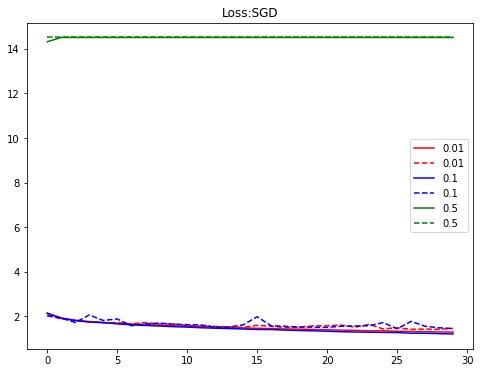

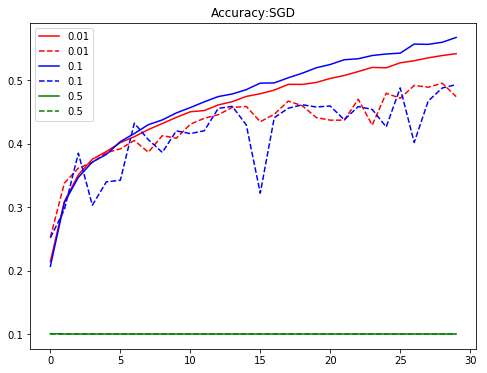

In [132]:
show_history(results, title)

In [134]:
def set_model():
    results = {}
    for lr in learning_rate:
        keras.backend.clear_session()
        print(f"start by lr = {lr}")
        model = build_mlp(x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.RMSprop(lr= lr, rho=0.9, epsilon=None, decay=0.5)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(x_train,y_train, epochs = epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True)
        
        
        train_loss = model.history.history['loss']
        valid_loss = model.history.history['val_loss']
        train_acc = model.history.history['acc']
        valid_acc = model.history.history['val_acc']
        
        
        train_tag = lr
        results[train_tag] = {
            'train_loss':train_loss,
            'valid_loss':valid_loss,
            'train_acc':train_acc,
            'valid_acc':valid_acc
        }
    return results;

In [135]:
title = 'RMSprop'
results = set_model()

start by lr = 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layers1 (Dense)       (None, 256)               786688    
_________________________________________________________________
hidden_layers2 (Dense)       (None, 128)               32896     
_________________________________________________________________
hidden_layers3 (Dense)       (None, 32)                4128      
_________________________________________________________________
hidden_layers4 (Dense)       (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 826,474
Trainable params: 826,474
Non-trainable params: 0
___________________________________________________

Epoch 13/30
50000/50000 [==============================] - 4s 87us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/30
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/30
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/30
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/30
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/30
50000/50000 [==============================] - 4s 87us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/30
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/30
50000/50

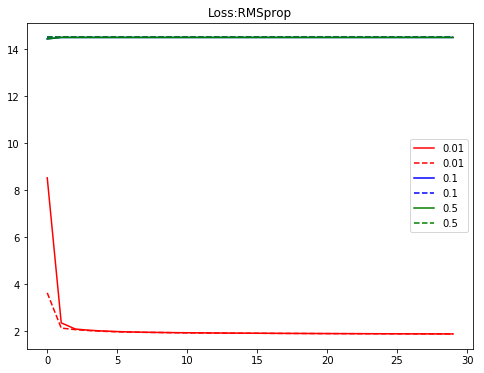

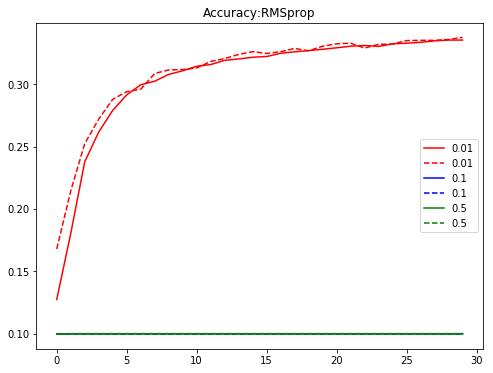

In [136]:
show_history(results, title)

In [138]:
def set_Adagrad_model():
    results = {}
    for lr in learning_rate:
        keras.backend.clear_session()
        print(f"start by lr = {lr}")
        model = build_mlp(x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.3)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(x_train,y_train, epochs = epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True)
        
        
        train_loss = model.history.history['loss']
        valid_loss = model.history.history['val_loss']
        train_acc = model.history.history['acc']
        valid_acc = model.history.history['val_acc']
        
        
        train_tag = lr
        results[train_tag] = {
            'train_loss':train_loss,
            'valid_loss':valid_loss,
            'train_acc':train_acc,
            'valid_acc':valid_acc
        }
    return results;

In [139]:
title = 'Adagrad'
results = set_model()

start by lr = 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layers1 (Dense)       (None, 256)               786688    
_________________________________________________________________
hidden_layers2 (Dense)       (None, 128)               32896     
_________________________________________________________________
hidden_layers3 (Dense)       (None, 32)                4128      
_________________________________________________________________
hidden_layers4 (Dense)       (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 826,474
Trainable params: 826,474
Non-trainable params: 0
___________________________________________________

50000/50000 [==============================] - 4s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/30
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/30
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/30
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/30
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/30
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/30
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/30
50000/50000 [=======

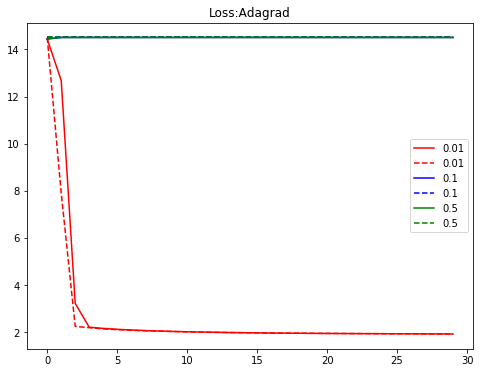

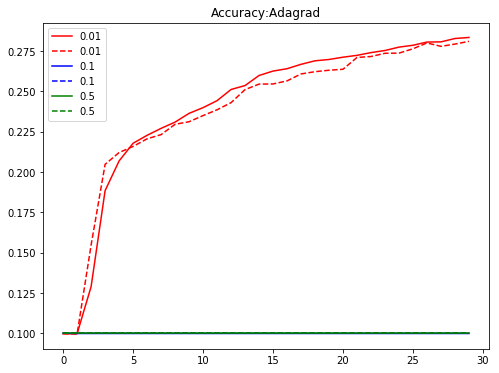

In [140]:
show_history(results, title)

In [141]:
def set_adam_model():
    results = {}
    for lr in learning_rate:
        keras.backend.clear_session()
        print(f"start by lr = {lr}")
        model = build_mlp(x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.Adam(lr=lr, epsilon=None, decay=0.0, amsgrad=False)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(x_train,y_train, epochs = epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True)
        
        
        train_loss = model.history.history['loss']
        valid_loss = model.history.history['val_loss']
        train_acc = model.history.history['acc']
        valid_acc = model.history.history['val_acc']
        
        
        train_tag = lr
        results[train_tag] = {
            'train_loss':train_loss,
            'valid_loss':valid_loss,
            'train_acc':train_acc,
            'valid_acc':valid_acc
        }
    return results;

In [142]:
title = 'Adam'
results = set_adam_model()

start by lr = 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layers1 (Dense)       (None, 256)               786688    
_________________________________________________________________
hidden_layers2 (Dense)       (None, 128)               32896     
_________________________________________________________________
hidden_layers3 (Dense)       (None, 32)                4128      
_________________________________________________________________
hidden_layers4 (Dense)       (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 826,474
Trainable params: 826,474
Non-trainable params: 0
___________________________________________________

Epoch 13/30
50000/50000 [==============================] - 5s 96us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/30
50000/50000 [==============================] - 5s 95us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/30
50000/50000 [==============================] - 5s 95us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/30
50000/50000 [==============================] - 5s 97us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/30
50000/50000 [==============================] - 5s 96us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/30
50000/50000 [==============================] - 5s 96us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/30
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/30
50000/50

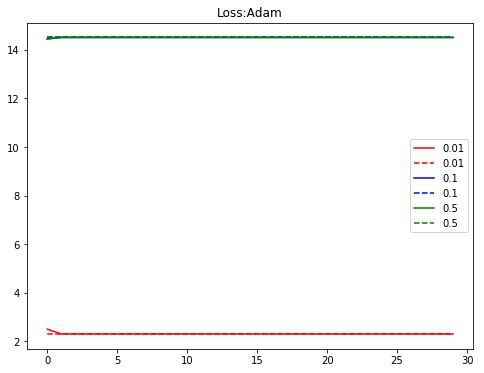

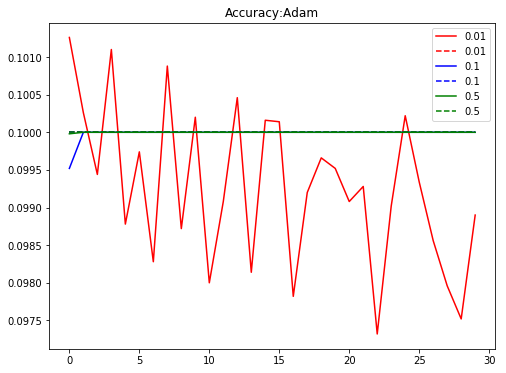

In [143]:
show_history(results, title)